# Todos
## Kui
1. Output the main long figure into pdf pages so that each page contains all of the results for a single structure. Using the page space well.
2. Include in each page a few patches from the original sections.
3. Add more brains as they become available.

## Bili
Use pdfPages to create PDF pages that demonstrate how the rough alignment works.



These pdfs will be used in the U19 meeting next monday 5/24

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [27]:
brains=['DK39', 'DK43', 'DK52']
!ls DetectionScoremap2/

DK39.npz    DK39_v2.npz DK43.npz    DK43_v2.npz DK52.npz    DK52_v2.npz


## 3D Detection score map
The files restore the results of the first round shift process searching for the maximal points.

Each file contains 6 3D arrays corresponding to the 6 chosen structures.
* The shape of each array is 31$\times$31$\times$31, corresponding to x, y, z(section).
* (15,15,15) is the center point, referring to the initial COM.
* The shift range is [-15,15] steps in each direction.

The detection maps are centered at COMs after rough alignments.

In [113]:
blank=zeros([31,31])
middle=15
_from=11
_to=20

In [156]:
from scipy import signal
def calcAutoCorrelation(sig,border=12): 
    #normalize mean and std
    nsig=sig-np.mean(sig.flatten())
    nsig=nsig/np.std(nsig.flatten())
    small=nsig[border:-border,border:-border,border:-border]
    corr = signal.correlate(nsig, small,mode='same')
    return corr,np.std(corr.flatten()),np.max(corr.flatten())

def plotCorr(corr):
    figure(figsize=[10,4])
    subplot(1,3,1)
    imshow(corr[15,:,:])
    title('X = 0')
    subplot(1,3,2)
    imshow(corr[:,15,:])
    title('Y = 0')
    subplot(1,3,3)
    imshow(corr[:,:,15])
    title('Z = 0');

In [157]:
def plot_detection_map(scoremap,_title=''):

    figure(figsize=[14,1.5])
    suptitle(_title)
    for i in range(_from,_to):
        subplot(1,9,i-_from+1)
        if i<middle:
            imshow(scoremap[:,:,i])
        elif i==middle:
            imshow(blank)
        else:
            imshow(np.floor(scoremap[:,:,i-1]))


In [158]:
from glob import glob
scoremap={}
for stack in brains:
    fn1='DetectionScoremap2/%s.npz'%stack
    fn2='DetectionScoremap2/%s_v2.npz'%stack
    scoremap[stack]= dict(np.load(fn1))
    v2=dict(np.load(fn2))
    scoremap[stack].update(v2)
stack_names=list(scoremap.keys())
stack_names

['DK39', 'DK43', 'DK52']

In [159]:
structures=list(scoremap[stack_names[0]].keys())

<ipython-input-157-dcc0fe2aee58>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=[14,1.5])


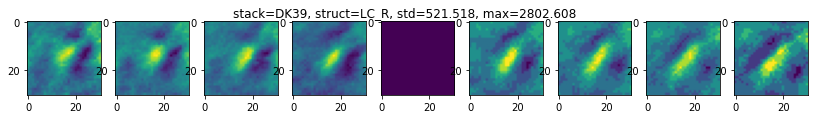

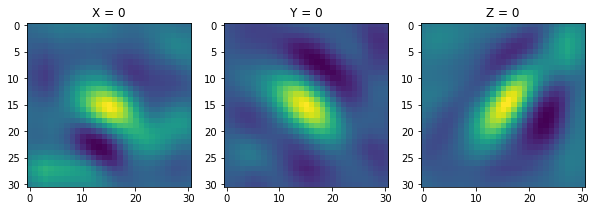

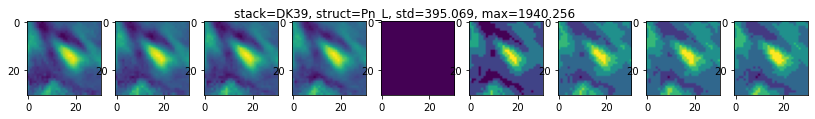

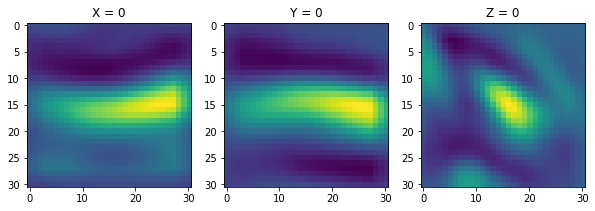

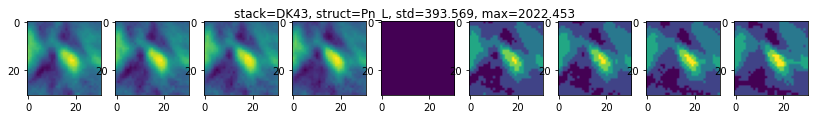

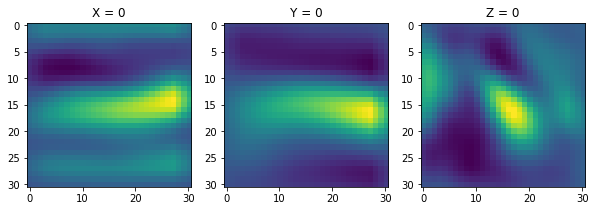

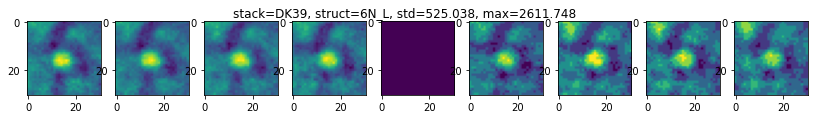

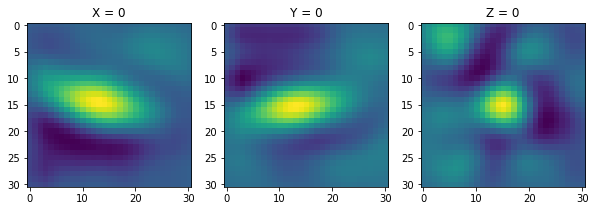

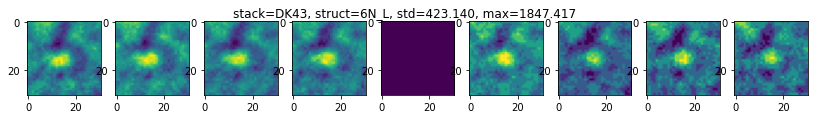

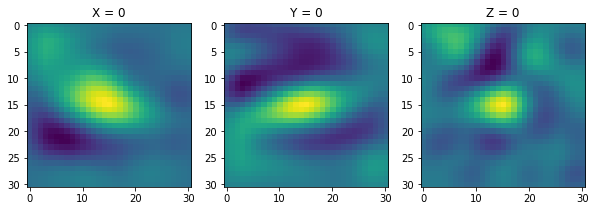

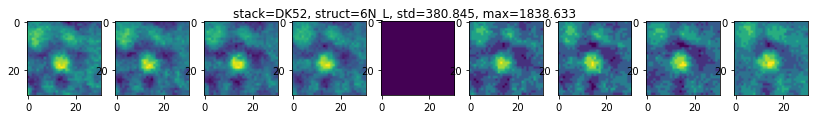

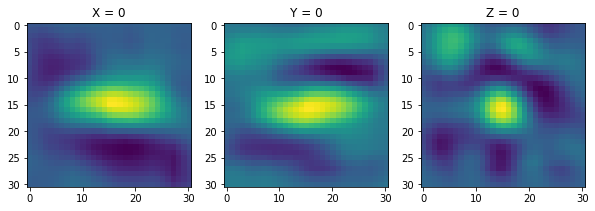

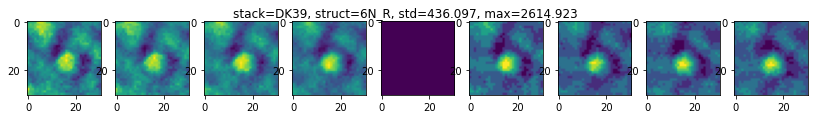

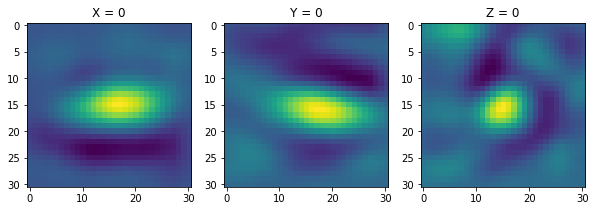

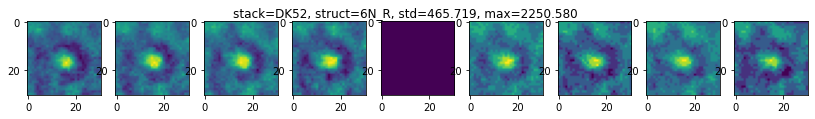

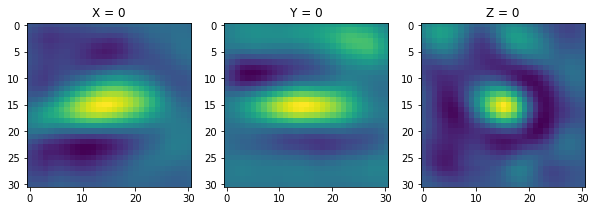

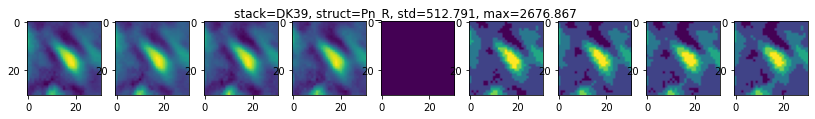

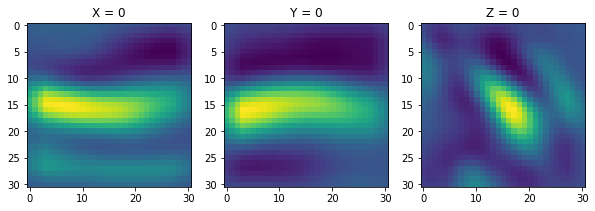

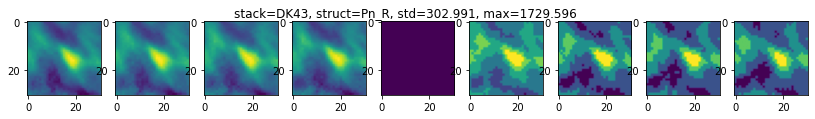

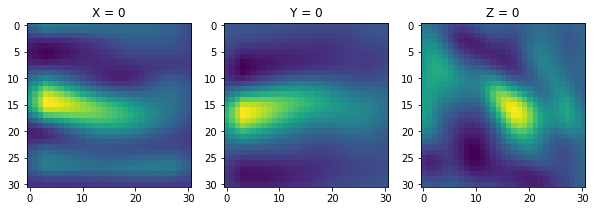

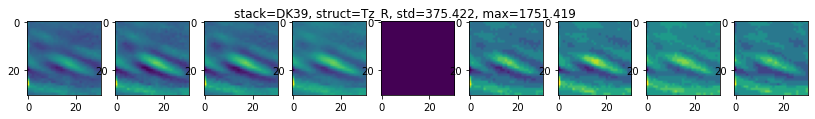

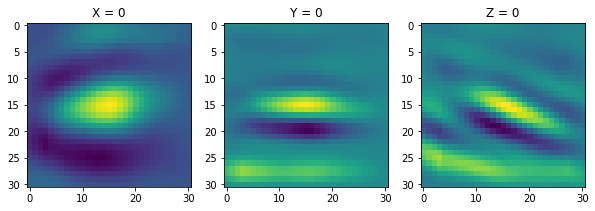

In [185]:
from matplotlib.backends.backend_pdf import PdfPages
pdf=PdfPages('DetectionMaps.pdf')

res=0.01
goodOnes={stack:[] for stack in brains}

for structure in structures:
    for stack in stack_names:
        smap=scoremap[stack][structure]
        corr,_std, _max = calcAutoCorrelation(smap)
        if _max<1500:
            continue
        goodOnes[stack].append(structure)
        plot_detection_map(smap,'stack=%s, struct=%s, std=%5.3f, max=%5.3f'\
                           %(stack,structure,_std,_max))
        pdf.savefig()
        #scorr=np.floor(corr/res)*res
        plotCorr(corr)
        pdf.savefig()

In [186]:
pdf.close()

In [187]:
!ls -lrt *.pdf
!open DetectionMaps.pdf

-rw-r--r--@ 1 yoavfreund  staff  135126 May 17 13:03 multipage_pdf.pdf
-rw-r--r--@ 1 yoavfreund  staff  721525 May 17 13:25 DetectionMaps.pdf


In [184]:
goodOnes

{'DK39': ['LC_R',
  'Pn_L',
  '5N_L',
  '5N_R',
  '6N_L',
  '6N_R',
  'LC_L',
  'Pn_R',
  'Tz_R'],
 'DK43': ['LC_R', 'Pn_L', '5N_L', '6N_L', 'DC_L', 'LC_L', 'Pn_R', 'Tz_R'],
 'DK52': ['LC_R', '6N_L', '6N_R', 'LC_L']}

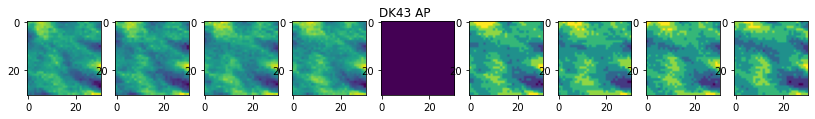

In [111]:
stack='DK43'
structure='AP'
smap=scoremap[stack][structure]
plot_detection_map(smap,stack+' '+structure)

std=1440.376, max=29791.000


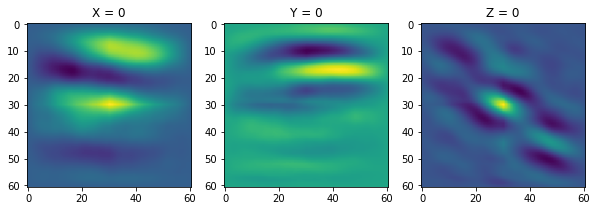

In [112]:
corr,_std,_max = calcAutoCorrelation(smap)
print('std=%5.3f, max=%5.3f'%(_std,_max))
plotCorr(corr)

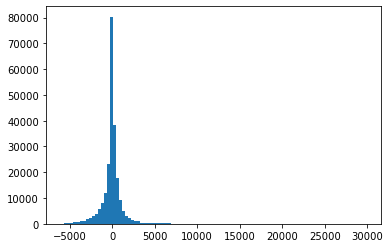

In [110]:
hist(corr.flatten(),bins=100);

In [172]:
import datetime
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Create the PdfPages object to which we will save the pages:
# The with statement makes sure that the PdfPages object is closed properly at
# the end of the block, even if an Exception occurs.
with PdfPages('multipage_pdf.pdf') as pdf:
    plt.figure(figsize=(3, 3))
    plt.plot(range(7), [3, 1, 4, 1, 5, 9, 2], 'r-o')
    plt.title('Page One')
    pdf.savefig()  # saves the current figure into a pdf page
    plt.close()

    # if LaTeX is not installed or error caught, change to `False`
    plt.rcParams['text.usetex'] = True
    plt.figure(figsize=(8, 6))
    x = np.arange(0, 5, 0.1)
    plt.plot(x, np.sin(x), 'b-')
    plt.title('Page Two')
    pdf.attach_note("plot of sin(x)")  # attach metadata (as pdf note) to page
    pdf.savefig()
    plt.close()

    plt.rcParams['text.usetex'] = False
    fig = plt.figure(figsize=(4, 5))
    plt.plot(x, x ** 2, 'ko')
    plt.title('Page Three')
    pdf.savefig(fig)  # or you can pass a Figure object to pdf.savefig
    plt.close()

    # We can also set the file's metadata via the PdfPages object:
    d = pdf.infodict()
    d['Title'] = 'Multipage PDF Example'
    d['Author'] = 'Jouni K. Sepp\xe4nen'
    d['Subject'] = 'How to create a multipage pdf file and set its metadata'
    d['Keywords'] = 'PdfPages multipage keywords author title subject'
    d['CreationDate'] = datetime.datetime(2009, 11, 13)
    d['ModDate'] = datetime.datetime.today()

In [173]:
!open multipage_pdf.pdf